# Extract weather data for individual stations

### Create smaller data files to use in workshop exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

### Read data from .csv file

#### 24 hours of weather data from various airport stations across Canada

In [2]:
df_all = pd.read_csv('../data/weather_stations.csv', index_col=0, parse_dates=True)
df_all.head()

,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind chill (C)
Datetime,,,,,,,,,,,,,,,,
2018-05-21 22:00:00,Canada/Pacific,22,YVR,Vancouver Int'l Airport,49.19,-123.18,Mainly Clear,14.8,75.0,10.0,NaN,101.6,48.0,N,5.0,NaN
2018-05-21 23:00:00,Canada/Pacific,23,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,13.5,76.0,9.0,NaN,101.6,32.0,NaN,0.0,NaN
2018-05-22 00:00:00,Canada/Pacific,0,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,13.1,77.0,9.0,NaN,101.6,32.0,E,11.0,NaN
2018-05-22 01:00:00,Canada/Pacific,1,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.9,84.0,10.0,NaN,101.6,32.0,E,8.0,NaN
2018-05-22 02:00:00,Canada/Pacific,2,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.2,88.0,10.0,NaN,101.6,32.0,E,12.0,NaN


### Explore the data a bit

In [3]:
pd.unique(df_all['Station Name'])

array(["Vancouver Int'l Airport", "Victoria Int'l Airport",
       'Prince George Airport', 'Whitehorse Airport',
       'Yellowknife Airport', 'Iqaluit Airport', "Edmonton Int'l Airport",
       "Calgary Int'l Airport", "Saskatoon Diefenbaker Int'l Airport",
       "Regina Int'l Airport", "Winnipeg Richardson Int'l Airport",
       'Thunder Bay Airport', "Toronto Pearson Int'l Airport",
       "Ottawa Macdonald-Cartier Int'l Airport",
       "Montreal-Trudeau Int'l Airport", "Quebec Lesage Int'l Airport",
       "Fredericton Int'l Airport", "Halifax Stanfield Int'l Airport",
       'Charlottetown Airport', "St. John's Int'l Airport"], dtype=object)

In [4]:
df_all['Conditions'].value_counts(dropna=False)

Mostly Cloudy                          148
Partly Cloudy                           90
Mainly Sunny                            48
Mainly Clear                            37
Clear                                   35
Sunny                                   34
Cloudy                                  31
Light Rain                              16
Light Snow                              15
Mist                                    11
Light Drizzle                            5
Light Rainshower                         4
Fog                                      4
Thunderstorm with light rainshowers      1
NaN                                      1
Name: Conditions, dtype: int64

In [5]:
df_all.describe()

,Hour of Day,Latitude,Longitude,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Speed (km/hr)
count,480.000000,480.000000,480.000000,479.000000,479.000000,478.000000,34.000000,479.000000,479.000000,479.000000
mean,11.500000,50.494000,-92.961500,13.974530,59.584551,4.987448,24.264706,101.406054,28.017119,13.561587
std,6.929408,5.694012,24.688061,7.892156,22.461791,5.523710,2.136392,0.439409,13.097566,9.334770
min,0.000000,43.680000,-135.070000,-7.100000,17.000000,-11.000000,22.000000,100.400000,1.200000,0.000000
25%,5.750000,46.185000,-114.117500,10.000000,40.500000,1.000000,23.000000,101.200000,24.000000,7.000000
50%,11.500000,48.920000,-93.280000,14.400000,61.000000,5.000000,23.500000,101.400000,24.000000,11.000000
75%,17.250000,52.455000,-70.682500,19.150000,78.000000,9.000000,25.000000,101.600000,32.000000,19.000000
max,23.000000,63.760000,-52.750000,28.600000,98.000000,15.000000,29.000000,102.400000,64.000000,54.000000


In [6]:
df_all.groupby('Station Name').mean()

,Hour of Day,Latitude,Longitude,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Speed (km/hr)
Station Name,,,,,,,,,,
Calgary Int'l Airport,11.5,51.12,-114.01,18.554167,42.666667,4.541667,NaN,101.537500,43.333333,11.375000
Charlottetown Airport,11.5,46.29,-63.12,10.291667,54.791667,0.500000,NaN,101.887500,24.000000,15.750000
Edmonton Int'l Airport,11.5,53.31,-113.58,17.950000,48.041667,5.083333,22.000000,101.400000,24.000000,7.791667
Fredericton Int'l Airport,11.5,45.87,-66.54,12.973913,53.695652,2.260870,NaN,101.821739,16.000000,16.260870
Halifax Stanfield Int'l Airport,11.5,44.88,-63.51,11.787500,48.166667,-0.217391,NaN,102.091667,24.000000,16.000000
Iqaluit Airport,11.5,63.76,-68.56,-5.283333,79.750000,-8.291667,NaN,100.937500,21.583333,31.708333
Montreal-Trudeau Int'l Airport,11.5,45.47,-73.74,16.508333,67.333333,9.916667,23.000000,101.595833,26.875000,11.041667
Ottawa Macdonald-Cartier Int'l Airport,11.5,45.32,-75.67,14.441667,77.208333,10.250000,NaN,101.616667,22.716667,7.458333
Prince George Airport,11.5,53.88,-122.68,15.300000,60.916667,6.166667,22.500000,101.362500,15.791667,6.666667


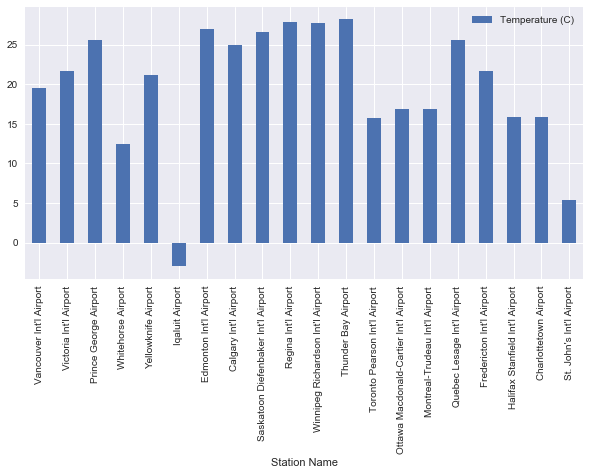

In [7]:
hour = 15
df_plot = df_all.loc[df_all['Hour of Day'] == hour, ['Station Name', 'Temperature (C)']]
df_plot.set_index('Station Name').plot.bar(figsize=(10, 5))

In [8]:
df_all[df_all['Conditions'] == 'Light Snow']

,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind chill (C)
Datetime,,,,,,,,,,,,,,,,
2018-05-22 01:00:00,Canada/Eastern,1,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.3,80.0,-9.0,NaN,101.1,24.0,NNW,19.0,-13
2018-05-22 02:00:00,Canada/Eastern,2,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.4,81.0,-9.0,NaN,101.1,24.0,NNW,20.0,-13
2018-05-22 03:00:00,Canada/Eastern,3,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.6,83.0,-9.0,NaN,101.1,16.0,NW,16.0,-13
2018-05-22 04:00:00,Canada/Eastern,4,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.6,78.0,-10.0,NaN,101.0,32.0,NW,25.0,-14
2018-05-22 05:00:00,Canada/Eastern,5,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-7.0,76.0,-10.0,NaN,101.1,24.0,NW,23.0,-15
2018-05-22 06:00:00,Canada/Eastern,6,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-7.1,77.0,-11.0,NaN,101.0,24.0,NW,22.0,-15
2018-05-22 07:00:00,Canada/Eastern,7,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.9,73.0,-11.0,NaN,101.0,10.0,NNW,26.0,-15
2018-05-22 08:00:00,Canada/Eastern,8,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.5,77.0,-10.0,NaN,101.0,10.0,NW,24.0,-14
2018-05-22 09:00:00,Canada/Eastern,9,YFB,Iqaluit Airport,63.76,-68.56,Light Snow,-6.5,78.0,-10.0,NaN,101.0,10.0,NNW,31.0,-15


In [9]:
conditions_missing = df_all['Conditions'].isnull()
df_all[conditions_missing]

,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relativehumidity(%),Dew point(C),Humidex (C),Pressure(kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind chill (C)
Datetime,,,,,,,,,,,,,,,,
2018-05-22 16:00:00,Canada/Atlantic,16,YFC,Fredericton Int'l Airport,45.87,-66.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extract data for individual stations

In [10]:
def extract_station(df_in, station_id):
    """Return data for a single station, with some columns removed"""
    cols_remove = ['Timezone', 'Hour of Day', 'Station ID', 'Station Name', 'Latitude', 'Longitude']
    df = df_in[df_in['Station ID'] == station_id]
    df = df.drop(cols_remove, axis=1)
    return df

In [11]:
# Vancouver, Saskatoon, Iqaluit
stations = ['YVR', 'YXE', 'YFB']
savedir = '../data/'

In [12]:
for station in stations:
    df = extract_station(df_all, station)
    savefile = savedir + f'weather_{station}_full.csv'
    print('Saving to ' + savefile)
    df.to_csv(savefile)

    # Save a mini version of YVR data for the first exercise
    if station == 'YVR':
        df_mini = df[['Conditions', 'Temperature (C)', 'Relativehumidity(%)']]
        savefile_mini = savedir + f'weather_{station}.csv'
        print('Saving to ' + savefile_mini)
        df_mini.to_csv(savefile_mini)

Saving to ../data/weather_YVR_full.csv
Saving to ../data/weather_YVR.csv
Saving to ../data/weather_YXE_full.csv
Saving to ../data/weather_YFB_full.csv
